In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F

from torch import nn
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel

In [ ]:
# Путь к файлу с сохраненной моделью
model_path = '/rdy2use_faster_rcnn_model.pth'

# Загрузка модели
model = fasterrcnn_resnet50_fpn(pretrained=False)
num_classes = 5
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.load_state_dict(torch.load(model_path))
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 151MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-rus
!sudo apt install tesseract-ocr-eng
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,944 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

In [ ]:
import os
import re
import cv2
import numpy as np
import pandas as pd

In [ ]:
# Путь к тестовому изображению
original_image_path = '2.png'
code = original_image_path[0]

# Предобработка

In [ ]:
def draw_boxes(image, predictions):
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for box, label, score in zip(predictions['boxes'], predictions['labels'], predictions['scores']):
        box = [int(coord) for coord in box]
        if label == 1:
            color = 'magenta'
        elif label == 2:
            color = 'blue'
        elif label == 3:
            color = 'green'
        elif label == 4:
            color = 'purple'
        draw.rectangle(box, outline=color, width=3)
        draw.text((box[0], box[1]), f'Label: {label}, Score: {score}', fill=color, font=font)

    return image

[{'boxes': tensor([[678.2012, 344.4190, 782.1213, 664.4209],
        [782.1069, 347.6380, 963.6805, 678.3114],
        [ 13.2622, 345.3741, 447.8889, 758.9271],
        [462.0651, 332.6733, 670.6747, 690.8906]], device='cuda:0'), 'labels': tensor([3, 4, 1, 2], device='cuda:0'), 'scores': tensor([0.6856, 0.6520, 0.4856, 0.3663], device='cuda:0')}]


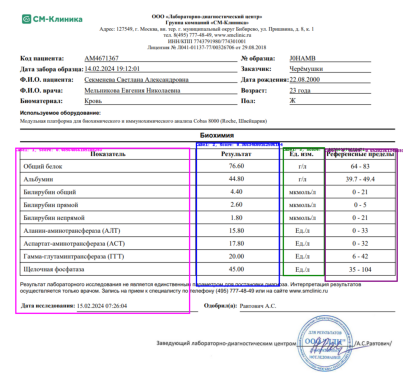

In [ ]:
# Загрузка изображения
image = Image.open(original_image_path)
image_tensor = F.to_tensor(image)[:3, :, :].unsqueeze(0).to(device)

# Получение прогнозов модели
with torch.no_grad():
    predictions = model(image_tensor)

# Обработка прогнозов здесь (например, вывод результатов)
print(predictions)

# Отображение изображения с прямоугольниками и подписанными лейблами
image_with_boxes = draw_boxes(image.copy(), predictions[0])
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()

In [ ]:
def save_cropped_image(image_path, box, label, output_dir):
    image = Image.open(image_path)
    box = [int(coord.item()) for coord in box]  # Преобразование тензора в список чисел
    cropped_image = image.crop(box)
    cropped_image.save(f"{output_dir}/{code}_{label}.png")

output_dir = "/content"  # Директория для сохранения обрезанных изображений

# Проход по каждому прямоугольнику и сохранение обрезанных изображений с метками в названиях
for i, (box, label) in enumerate(zip(predictions[0]['boxes'], predictions[0]['labels'])):
  if predictions[0]['scores'][i] > 0.1:
    save_cropped_image(original_image_path, box, label.item(), output_dir)

# Обработка блоков справки

In [ ]:
folder_path = '/content'
words_to_check = ['результат', 'норм', 'рефер', 'показа', 'врач', 'дата', 'изм.']

ref_list = []
res_list = []
analyte_list = []
units_list = []

def improve_image_quality(image, factor_e):
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # if ench:
    enhancer = ImageEnhance.Sharpness(image_pil)
    factor = factor_e
    image_pil = enhancer.enhance(factor)

    image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l = clahe.apply(l)

    lab = cv2.merge((l, a, b))
    image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    return image


def clean_strings(data_list):
    return [item.strip() for item in data_list if '\x0c' not in item and item.strip()]

for file_name in os.listdir(folder_path):
    if code+'_' in file_name:
        data_type = file_name.split('_')[1][:-4]
        print(data_type)

        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        if data_type == '2' or data_type == '4':
          factor_e = 1
        else:
          factor_e = 2

        improved_image = improve_image_quality(image, factor_e)
        text = pytesseract.image_to_string(improved_image, lang='rus') #+eng

        data_list = clean_strings(text.split("\n"))

        result_list = []

        for sublist in data_list:
            for word in words_to_check:
                if word.lower() in sublist.lower():
                    break
            else:
                result_list.append(sublist)

        if data_type == '1':
            analyte_list.append(result_list)
        elif data_type == '2':
            res_list.append(result_list)
        elif data_type == '3':
            units_list.append(result_list)
        elif data_type == '4':
            ref_list.append(result_list)


df = pd.DataFrame()


for category, data_list in zip(['analyte', 'res', 'units', 'ref'], [analyte_list, res_list, units_list, ref_list]):
    temp_df = pd.DataFrame(data_list)
    temp_df = temp_df.transpose()
    temp_df.columns = [category]

    df = pd.concat([df, temp_df], axis=1)

df = df.dropna(thresh=3)
df.reset_index(drop=True, inplace=True)
df

3
4
2
1


,analyte,res,units,ref
0,Общий белок,76.60,гл,64-83
1,Альбумин,44.80,гл,39.7 - 49.4
2,Билирубин общий,4.40,мкмоль/л,0-21
3,Билирубин прямой,2.60,мкмоль/л,0-5
4,Билирубин непрямой,1.80,мкмоль/л,0-21
5,Аланин-аминотрансфераза (АЛТ).,15.80,Ед,0-33
6,Аспартат-аминотрансфераза (АСТ),17.80,Ед,0-32
7,Гамма-глутаминтрансфераза (ГГТ),20.00,Ед,6-42
8,Щелочная фосфатаза,45.00,Ед/л,35 - 104


# Постобработка

## FuzzyWuzzy

In [ ]:
df_analytes = pd.read_excel('/Full analytes.xlsx')

In [ ]:
def find_closest_match(value, choices):
    if pd.isnull(value):
        return None
    closest_match = process.extractOne(value, choices)
    return closest_match

df['DB_analytes'] = df['analyte'].apply(lambda x: find_closest_match(x, df_analytes['analytes'])[0])
df['score'] = df['analyte'].apply(lambda x: find_closest_match(x, df_analytes['analytes'])[1])

df

,analyte,res,units,ref,DB_analytes,score
0,Общий белок,76.60,гл,64-83,Общий белок,100
1,Альбумин,44.80,гл,39.7 - 49.4,Альбумин,100
2,Билирубин общий,4.40,мкмоль/л,0-21,Билирубин общий,100
3,Билирубин прямой,2.60,мкмоль/л,0-5,Билирубин прямой,100
4,Билирубин непрямой,1.80,мкмоль/л,0-21,Билирубин прямой,94
5,Аланин-аминотрансфераза (АЛТ).,15.80,Ед,0-33,Аланинаминотрансфераза (АлАТ или ALT),84
6,Аспартат-аминотрансфераза (АСТ),17.80,Ед,0-32,Аспартатаминотрансфераза (АсАТ или AST),85
7,Гамма-глутаминтрансфераза (ГГТ),20.00,Ед,6-42,Гамма-глютамилтранспептидаза (ГГТ),83
8,Щелочная фосфатаза,45.00,Ед/л,35 - 104,Фосфатаза щелочная,95


## Bert

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        # self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, int(self.bert.config.hidden_size/2))
        self.fc2 = nn.Linear(int(self.bert.config.hidden_size/2), num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        # x = self.dropout(pooled_output)
        x = pooled_output
        linear1 = self.fc1(pooled_output)
        logits = self.fc2(linear1)
        return logits

In [ ]:
def predict_sentiment(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probabilities = F.softmax(outputs, dim=1)
        top_probs, top_classes = torch.topk(probabilities, 1)
        # _, preds = torch.max(outputs, dim=1)

    top_probs = top_probs.cpu().numpy().flatten()
    top_classes = top_classes.cpu().numpy().flatten()

    return list(zip(top_classes, top_probs))

In [ ]:
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model_BERT = torch.load('/content/drive/MyDrive/magister/ruBert_HSE_analytes.pth')

In [ ]:
def predict_analyte(text):
  pred_class = predict_sentiment(text, model_BERT, tokenizer, device)
  for class_id, prob in pred_class:
    if prob >= 0.01:
      name = df_analytes['analytes'][class_id]
  return name, prob

# df_bert = df.copy()
df['BERT_analytes'] = df['analyte'].apply(lambda x: predict_analyte(x)[0])
df['BERT_score'] = df['analyte'].apply(lambda x: round(predict_analyte(x)[1]*100, 2))
df

,analyte,res,units,ref,DB_analytes,score,BERT_analytes,BERT_score
0,Общий белок,76.60,гл,64-83,Общий белок,100,Общий белок,8.76
1,Альбумин,44.80,гл,39.7 - 49.4,Альбумин,100,Альбумин,4.04
2,Билирубин общий,4.40,мкмоль/л,0-21,Билирубин общий,100,Билирубин общий,5.04
3,Билирубин прямой,2.60,мкмоль/л,0-5,Билирубин прямой,100,Билирубин прямой,20.08
4,Билирубин непрямой,1.80,мкмоль/л,0-21,Билирубин прямой,94,Билирубин косвенный/непрямой,32.23
5,Аланин-аминотрансфераза (АЛТ).,15.80,Ед,0-33,Аланинаминотрансфераза (АлАТ или ALT),84,Функциональная активность иммунной системы (на...,5.02
6,Аспартат-аминотрансфераза (АСТ),17.80,Ед,0-32,Аспартатаминотрансфераза (АсАТ или AST),85,Аспартатаминотрансфераза (АсАТ или AST),8.24
7,Гамма-глутаминтрансфераза (ГГТ),20.00,Ед,6-42,Гамма-глютамилтранспептидаза (ГГТ),83,Гамма-глютамилтранспептидаза (ГГТ),17.77
8,Щелочная фосфатаза,45.00,Ед/л,35 - 104,Фосфатаза щелочная,95,Аммонийный ион,4.13


# Вывод результатов

In [ ]:
df['analyte'] = df.apply(lambda row: row['DB_analytes'] if row['score'] >= row['BERT_score'] else row['BERT_analytes'], axis=1)
df.drop(columns=['DB_analytes', 'score', 'BERT_analytes', 'BERT_score'], inplace=True)

df

,analyte,res,units,ref
0,Общий белок,76.60,гл,64-83
1,Альбумин,44.80,гл,39.7 - 49.4
2,Билирубин общий,4.40,мкмоль/л,0-21
3,Билирубин прямой,2.60,мкмоль/л,0-5
4,Билирубин прямой,1.80,мкмоль/л,0-21
5,Аланинаминотрансфераза (АлАТ или ALT),15.80,Ед,0-33
6,Аспартатаминотрансфераза (АсАТ или AST),17.80,Ед,0-32
7,Гамма-глютамилтранспептидаза (ГГТ),20.00,Ед,6-42
8,Фосфатаза щелочная,45.00,Ед/л,35 - 104


In [ ]:
def check_result_in_range_and_warning(row):
    # Используем регулярное выражение для удаления символов до первой цифры и после последней цифры
    ref_range = re.search(r'\d+(?:\.\d+)?\s*-\s*\d+(?:\.\d+)?', row['ref'])
    if ref_range:
        min_ref, max_ref = map(float, ref_range.group().split('-'))
        if pd.notna(row['res']) and not (min_ref < float(row['res']) < max_ref):
            if float(row['res']) < min_ref:
                print(f"Внимание! Показатель \"{row['analyte']}\" ниже нормы")
            else:
                print(f"Внимание! Показатель \"{row['analyte']}\" выше нормы")
            return 'Обратите внимание!'
    return ''

df.loc[:, 'result_in_range'] = df.apply(lambda row: check_result_in_range_and_warning(row), axis=1)

if not df['result_in_range'].astype(bool).any():
    df.drop(columns=['result_in_range'], inplace=True)
    print('Анализы в норме')
else:
  print('\nНе все анализы в норме.\nПредупредите заболевание, оцените симптомы здесь и сейчас: https://symptomcheck.ru/dialogue')
df

Анализы в норме


,analyte,res,units,ref
0,Общий белок,76.60,гл,64-83
1,Альбумин,44.80,гл,39.7 - 49.4
2,Билирубин общий,4.40,мкмоль/л,0-21
3,Билирубин прямой,2.60,мкмоль/л,0-5
4,Билирубин прямой,1.80,мкмоль/л,0-21
5,Аланинаминотрансфераза (АлАТ или ALT),15.80,Ед,0-33
6,Аспартатаминотрансфераза (АсАТ или AST),17.80,Ед,0-32
7,Гамма-глютамилтранспептидаза (ГГТ),20.00,Ед,6-42
8,Фосфатаза щелочная,45.00,Ед/л,35 - 104


In [ ]:
df.to_excel(original_image_path[:-4]+'.xlsx')